![title](net.jpg)

In [229]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import datetime as dt
import calendar
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
%matplotlib inline 

In [230]:
# Lendo o dataframe
ntf = pd.read_csv(r"C:\Users\Eduarda\Documents\Data Analysis\Netflix\netflix_titles.csv")

# Setando as configurações de visualização

In [231]:
# Configurando o tamanho das imagens plotadas
sns.set(rc={'figure.figsize':(12,10)})
#plt.rc('font', size=12) #controls default text sizes
#plt.rc('axes', titlesize=14) #fontsize of the axes title
#plt.rc('axes', labelsize=12) #fontsize of the x and y labels
#plt.rc('xtick', labelsize=12) #fontsize of the tick labels
#plt.rc('ytick', labelsize=12) #fontsize of the tick labels
#plt.rc('legend', fontsize=12) #legend fontsize
#plt.rc('figure', titlesize=14) #fontsize of the figure title
#plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

# Setando a visualização das colunas do df
pd.set_option("display.max_columns",None)

In [232]:
# Visualizando o dataframe
ntf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Tratamento dos dados

In [233]:
# Verificando a qtd de valores nulos no df
ntf.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [234]:
# Retirando valores nulos 
ntf = ntf.dropna(subset=['date_added'])

In [235]:
# Extraindo as informações de ano, mês e dia
ntf['month_added'] = pd.to_datetime(ntf['date_added'],errors='coerce').dt.month
ntf['year_added'] = pd.to_datetime(ntf['date_added'],errors='coerce').dt.year
ntf['day_added'] = pd.to_datetime(ntf['date_added'],errors='coerce').dt.day

In [236]:
# Aplicando as funções para extrair as informações de ano, mês e dia que os filmes/séries foram add na lista
def month_added(x):
    return calendar.month_name[x]


ntf['month_added_name'] = ntf['month_added'].apply(lambda x: month_added(x) if x != np.nan else np.nan)

#Retirando a coluna de date_added
ntf.drop(columns=['date_added'],inplace=True)

In [237]:
# Add a coluna referente ao tempo de diferença em que o filme foi lançado e quando foi add na lista da netflix
ntf['release_year'] = ntf['release_year'].astype('int32')
ntf['year_added'] = pd.to_numeric(ntf['year_added'],errors='coerce')
ntf['delta_time_year'] = ntf['year_added'] - ntf['release_year']

In [238]:
# Separando os gêneros de cada filme/TV show em colunas
def gender(x):
    return x.split(',')[0]

def gender_1(x):
    if len(x.split(',')) >= 2 :
        return x.split(',')[1]

def gender_2(x):
    if len(x.split(',')) > 2 :
        return x.split(',')[-1]

    
# Aplicando as funções
ntf['gender_0'] = ntf['listed_in'].apply(lambda x: gender(x))
ntf['gender_1'] = ntf['listed_in'].apply(lambda x: gender_1(x))
ntf['gender_2'] = ntf['listed_in'].apply(lambda x: gender_2(x))

In [239]:
# retirando a informação de season
ntf['season_count'] = ntf.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else np.nan, axis = 1)
ntf['duration'] = ntf.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else np.nan, axis = 1)
ntf['duration'] =  ntf['duration'].apply(lambda x : float(x) if x != np.nan else np.nan)

In [240]:
# Dividindo o dataset em filmes e séries
filmes = ntf.loc[ntf['type'] == 'Movie']
series = ntf.loc[ntf['type'] == 'TV Show']

In [241]:
ntf.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,day_added,month_added_name,delta_time_year,gender_0,gender_1,gender_2,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90.0,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9,September,0,Children & Family Movies,Comedies,None,NaN
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,TV-MA,94.0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9,September,0,Stand-Up Comedy,None,None,NaN
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,NaN,Kids' TV,"With the help of three human allies, the Autob...",9,2018,8,September,5,Kids' TV,None,None,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,NaN,Kids' TV,When a prison ship crash unleashes hundreds of...,9,2018,8,September,2,Kids' TV,None,None,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99.0,Comedies,When nerdy high schooler Dani finally attracts...,9,2017,8,September,0,Comedies,None,None,NaN


# TASKS

1 - Ano
verificação dos anos de lançamento dos filmes
verificação dos anos de lançamento no catálogo na netflix

2 - Gênero
Quais são os gêneros mais produzidos

3 - Decrição
word cloud

4 - Mês
Qual mês obtém maior quantidade de filmes / séries lançadas ? 

5 - Dia
Quais são os dias da semana que obtém maior lançamento de filmes / séries ? 

6 - País
Quais são os países com a maior quantidade de filmes / séries lançadas ? 

7 - Type
filmes - qtd de filmes lançados, gêneros , duração
séries - qtd , gêneros , duração

8 - rating
verificar a quantidade de filmes por faixa etária

9 - season
verificar as série com maior quantidade de temporadas


# Type

In [242]:
# Visualizando a porcentagem em relação ao tipo de conteúdo 
col = "type"
grouped = ntf[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

# Qual é o mês do ano que obtém a maior quantidade de filmes lançados no catálogo ? 

O dia December contém a maior quantidade de filmes lançados com 473 lançamentos


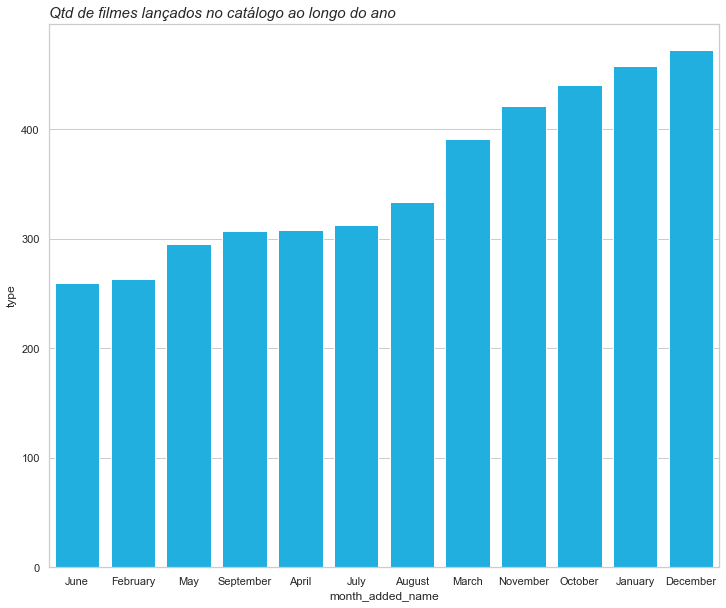

In [243]:
filmes_month = pd.DataFrame(filmes.groupby(['month_added_name'])['type'].count().sort_values(ascending=True)).reset_index()
print(f'O dia {filmes_month.loc[11][0]} contém a maior quantidade de filmes lançados com {filmes_month.loc[11][1]} lançamentos')

sns.barplot(x='month_added_name',y='type',data=filmes_month,color='deepskyblue')
plt.title("Qtd de filmes lançados no catálogo ao longo do ano",loc='left',fontsize=15,fontstyle='oblique')
plt.show()

# Qual é o mês que obtém a maior quantidade de séries lançadas no catálogo ?

O mês com maior quantidade de séries lançadas é December com 223 lançamentos


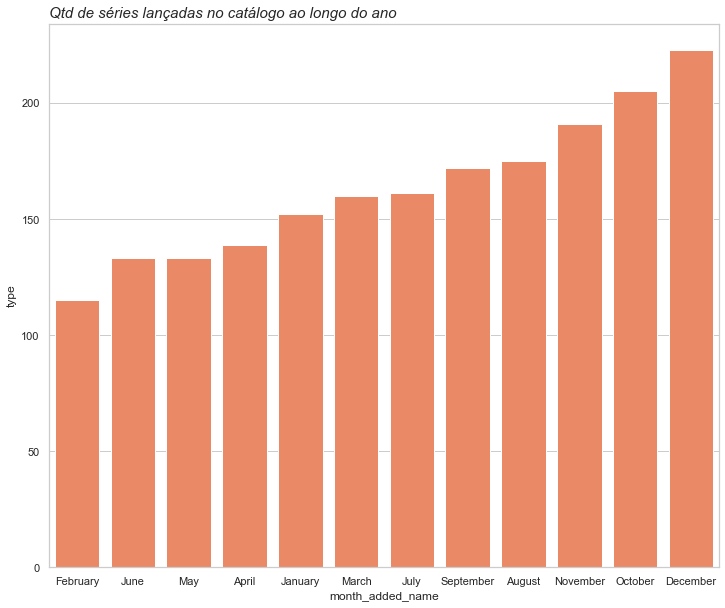

In [245]:
series_month = pd.DataFrame(series.groupby(['month_added_name'])['type'].count().sort_values(ascending=True)).reset_index()
print(f'O mês com maior quantidade de séries lançadas é {series_month.loc[11][0]} com {series_month.loc[11][1]} lançamentos')

sns.barplot(x='month_added_name',y='type',data=series_month,color='coral')
plt.title("Qtd de séries lançadas no catálogo ao longo do ano",loc='left',fontsize=15,fontstyle='oblique')
plt.show()

# Top 15 séries com maior quantidade de temporadas

In [250]:
season = pd.DataFrame(series.groupby('title')['season_count'].sum().sort_values(ascending=False).head(15)).reset_index()
season

,title,season_count
0,The Office (U.S.),9
1,Club Friday The Series 6,9
2,LEGO Ninjago: Masters of Spinjitzu,9
3,Shameless (U.S.),9
4,Forensic Files,9
5,Naruto,9
6,The Walking Dead,9
7,Portlandia,8
8,Club Friday The Series 8,8
9,Weeds,8


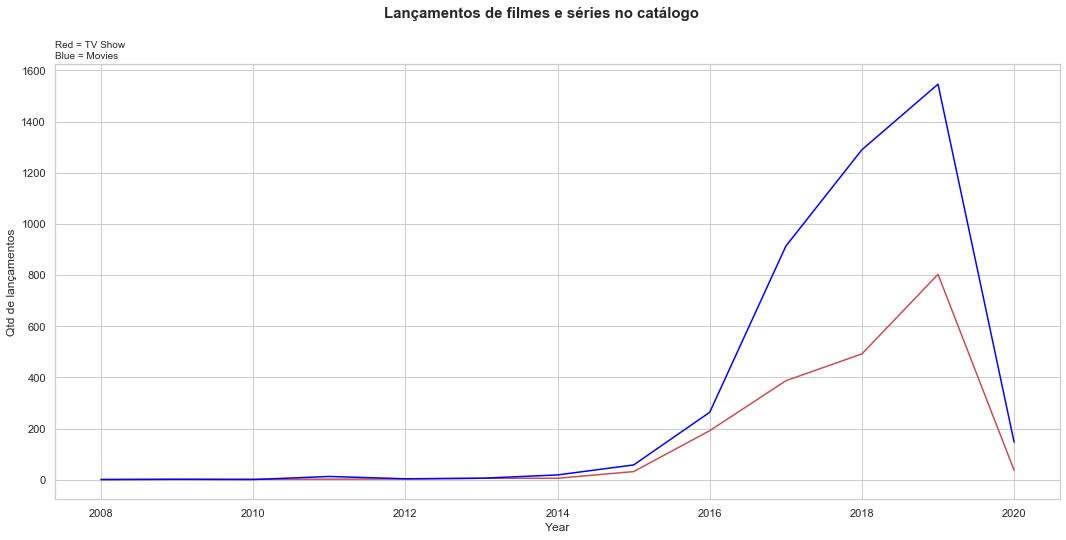

In [287]:
yr_s = series.loc[series['year_added'] > 2000]
yr_s = yr_s.groupby(['year_added'])['type'].count()
yr_f = filmes.loc[filmes['year_added'] > 2000]
yr_f =yr_f.groupby(['year_added'])['type'].count()
plt.figure(figsize=(18,8))
yr_s.plot(color='r')
yr_f.plot(color='blue')
plt.suptitle("Lançamentos de filmes e séries no catálogo",fontsize=15,weight = 'bold')
plt.title('Red = TV Show \nBlue = Movies',fontsize=10,loc='left')
plt.xlabel('Year')
plt.ylabel('Qtd de lançamentos')
plt.show()

# Year

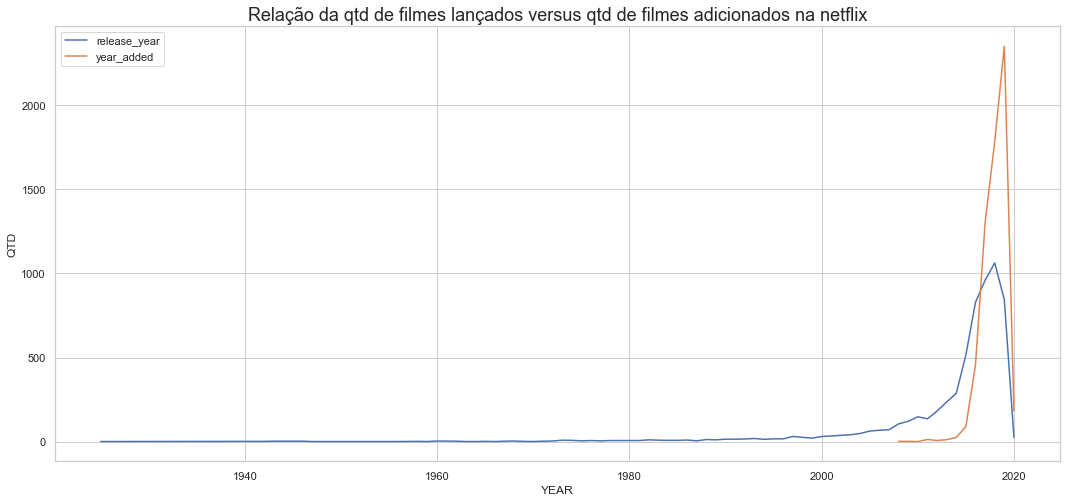

In [252]:
yr = ntf.groupby(['release_year'])['release_year'].count()
ya = ntf.groupby(['year_added'])['year_added'].count()
plt.figure(figsize=(18,8))
yr.plot(legend='released')
ya.plot(legend = 'added')
plt.title("Relação da qtd de filmes lançados versus qtd de filmes adicionados na netflix",fontsize=18,loc='center')
plt.ylabel('QTD')
plt.xlabel('YEAR')
plt.show()

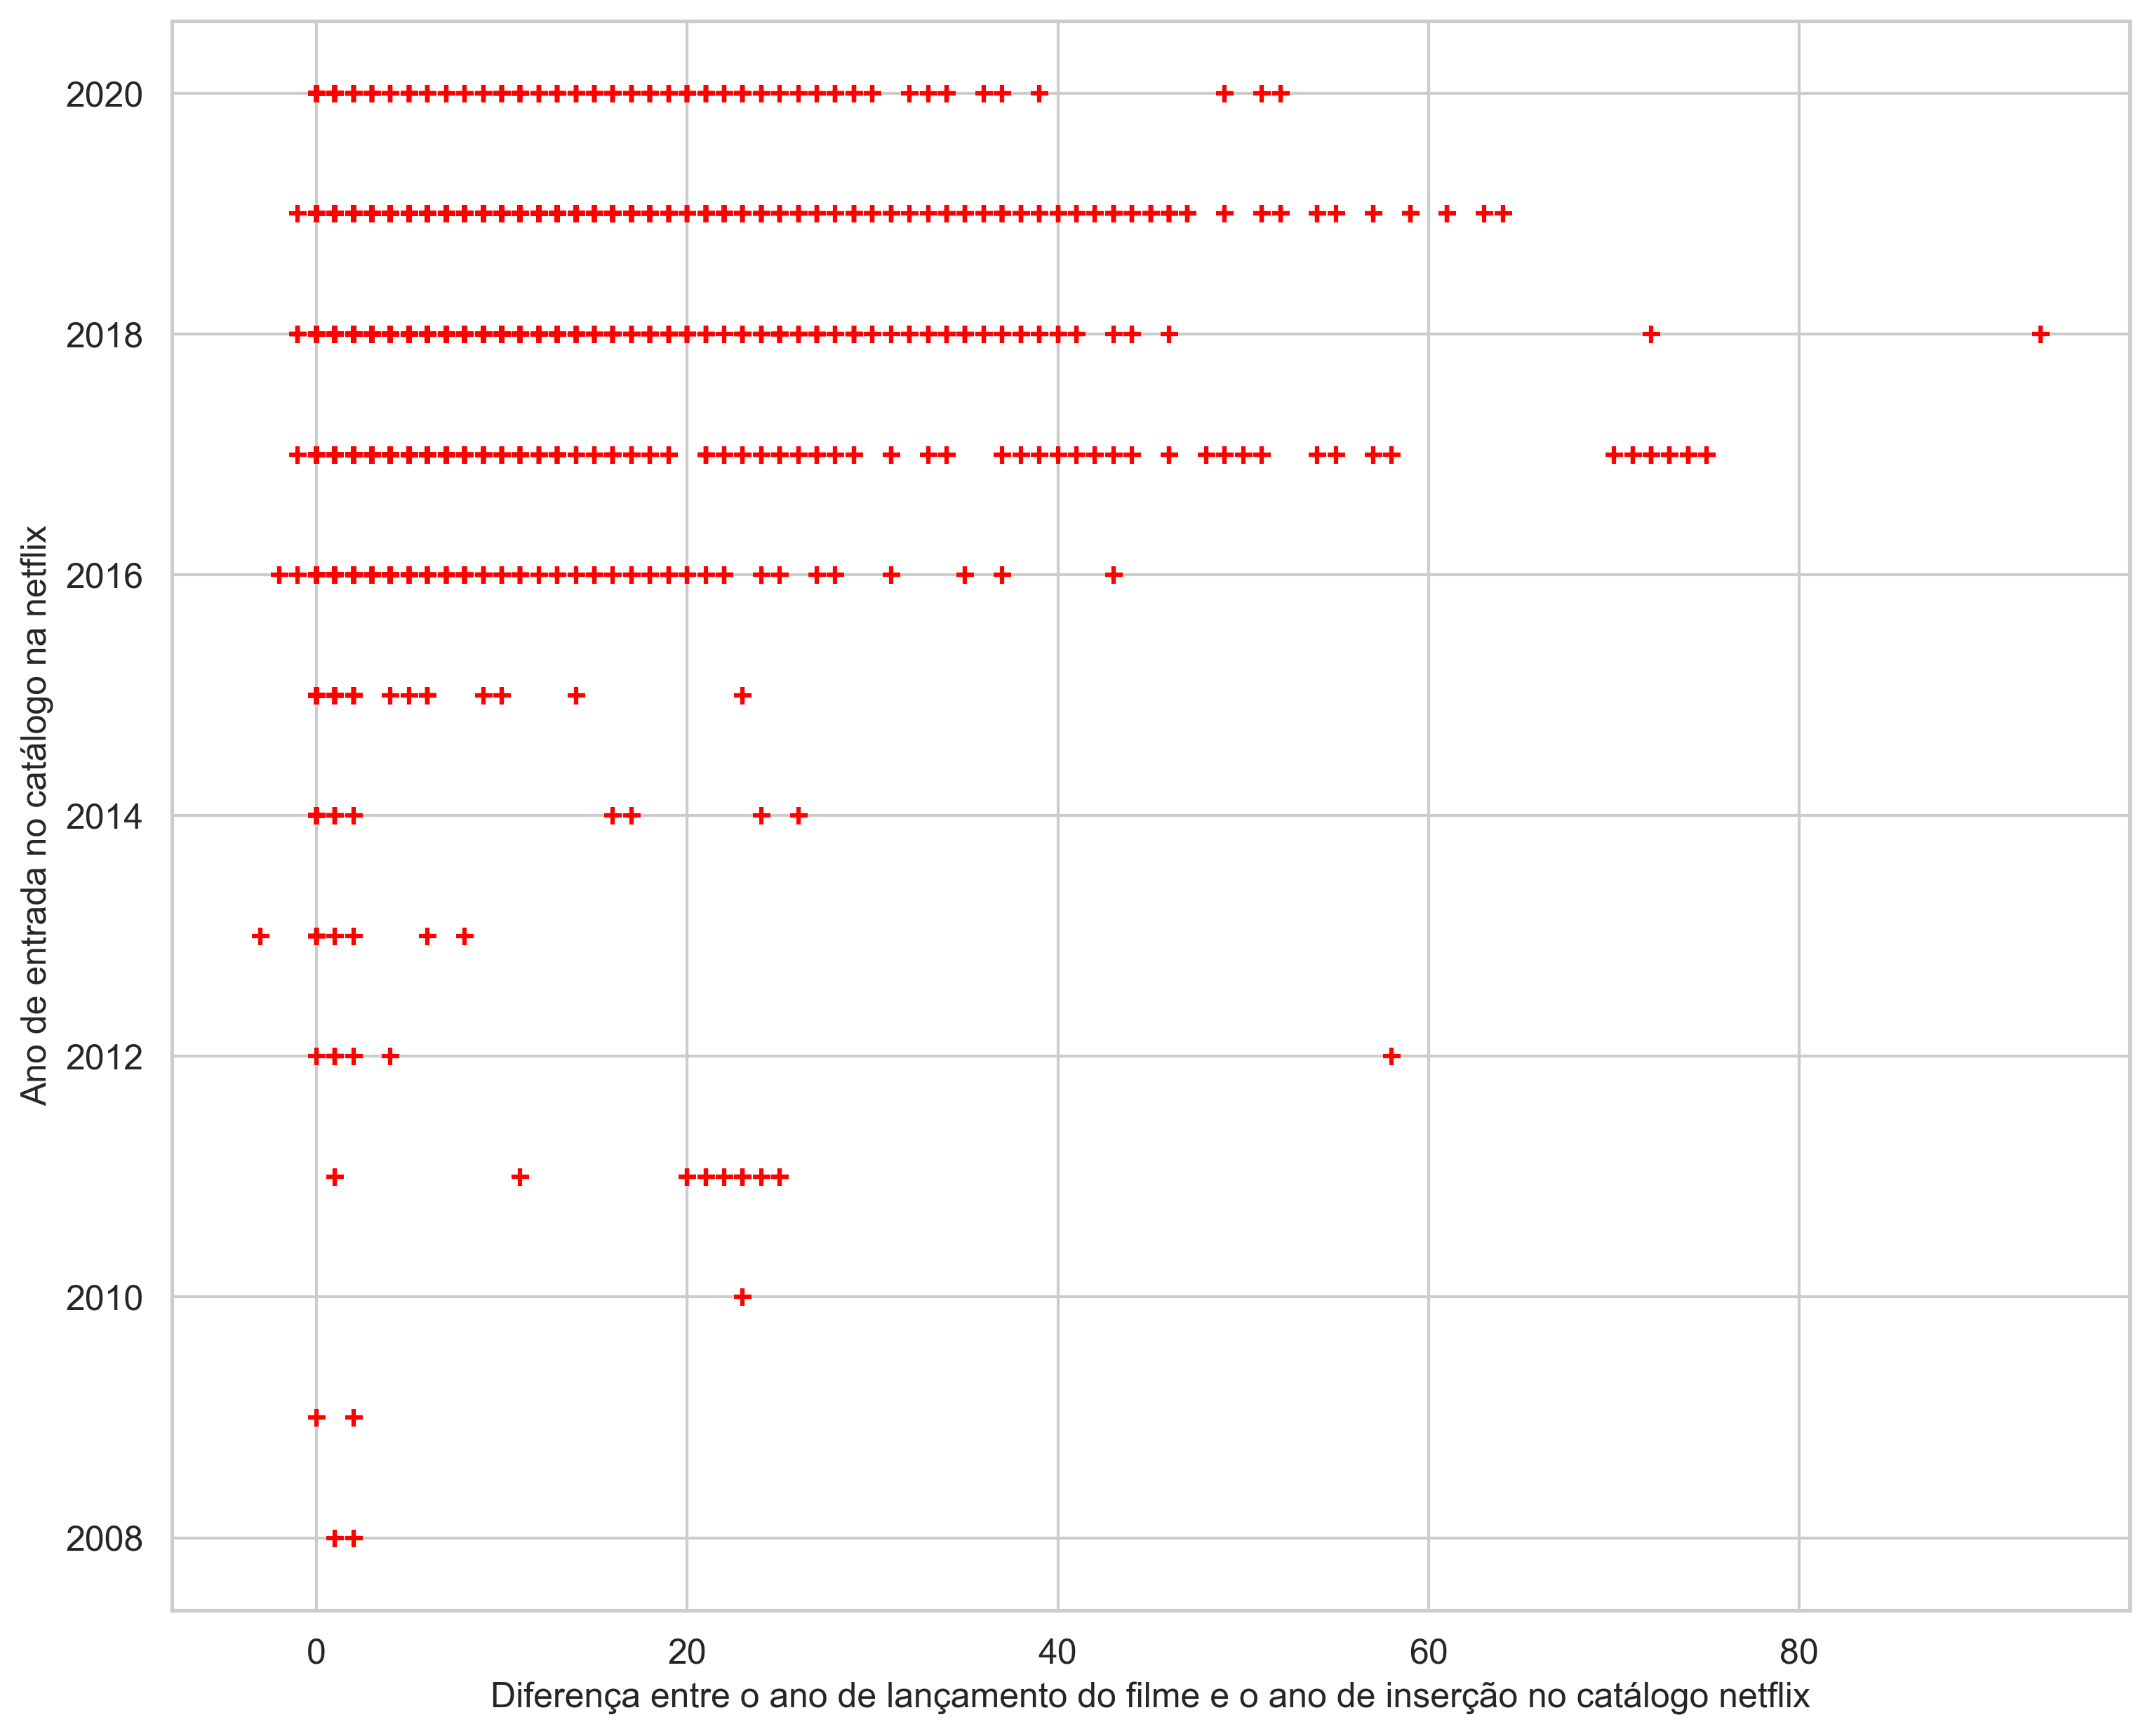

In [198]:
plt.scatter(ntf['delta_time_year'],ntf['year_added'],color='red',marker="+")
plt.xlabel('Diferença entre o ano de lançamento do filme e o ano de inserção no catálogo netflix')
plt.ylabel('Ano de entrada no catálogo na netflix')
plt.show()

# Gênero

# Description

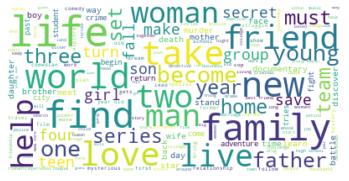

In [205]:
text = " ".join(review for review in ntf.description)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(text)
plt.figure()

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Country

In [204]:
#country_data = ntf['country']
#country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
#country_counting.drop(['NULL'], axis=0, inplace=True)